In [49]:
import re
import cv2
import json
import imutils
import easyocr
import numpy as np
from matplotlib import pyplot as plt

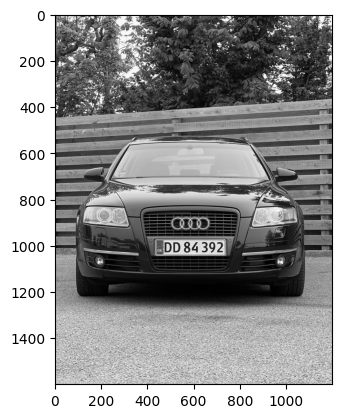

In [30]:
img  = cv2.imread("./misc/pictures/image_2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))

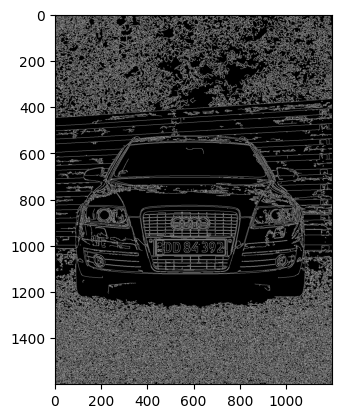

In [31]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [32]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:50]

In [37]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [38]:
print(location)

[[[ 432  979]]

 [[ 732  973]]

 [[ 737 1040]]

 [[ 437 1045]]]


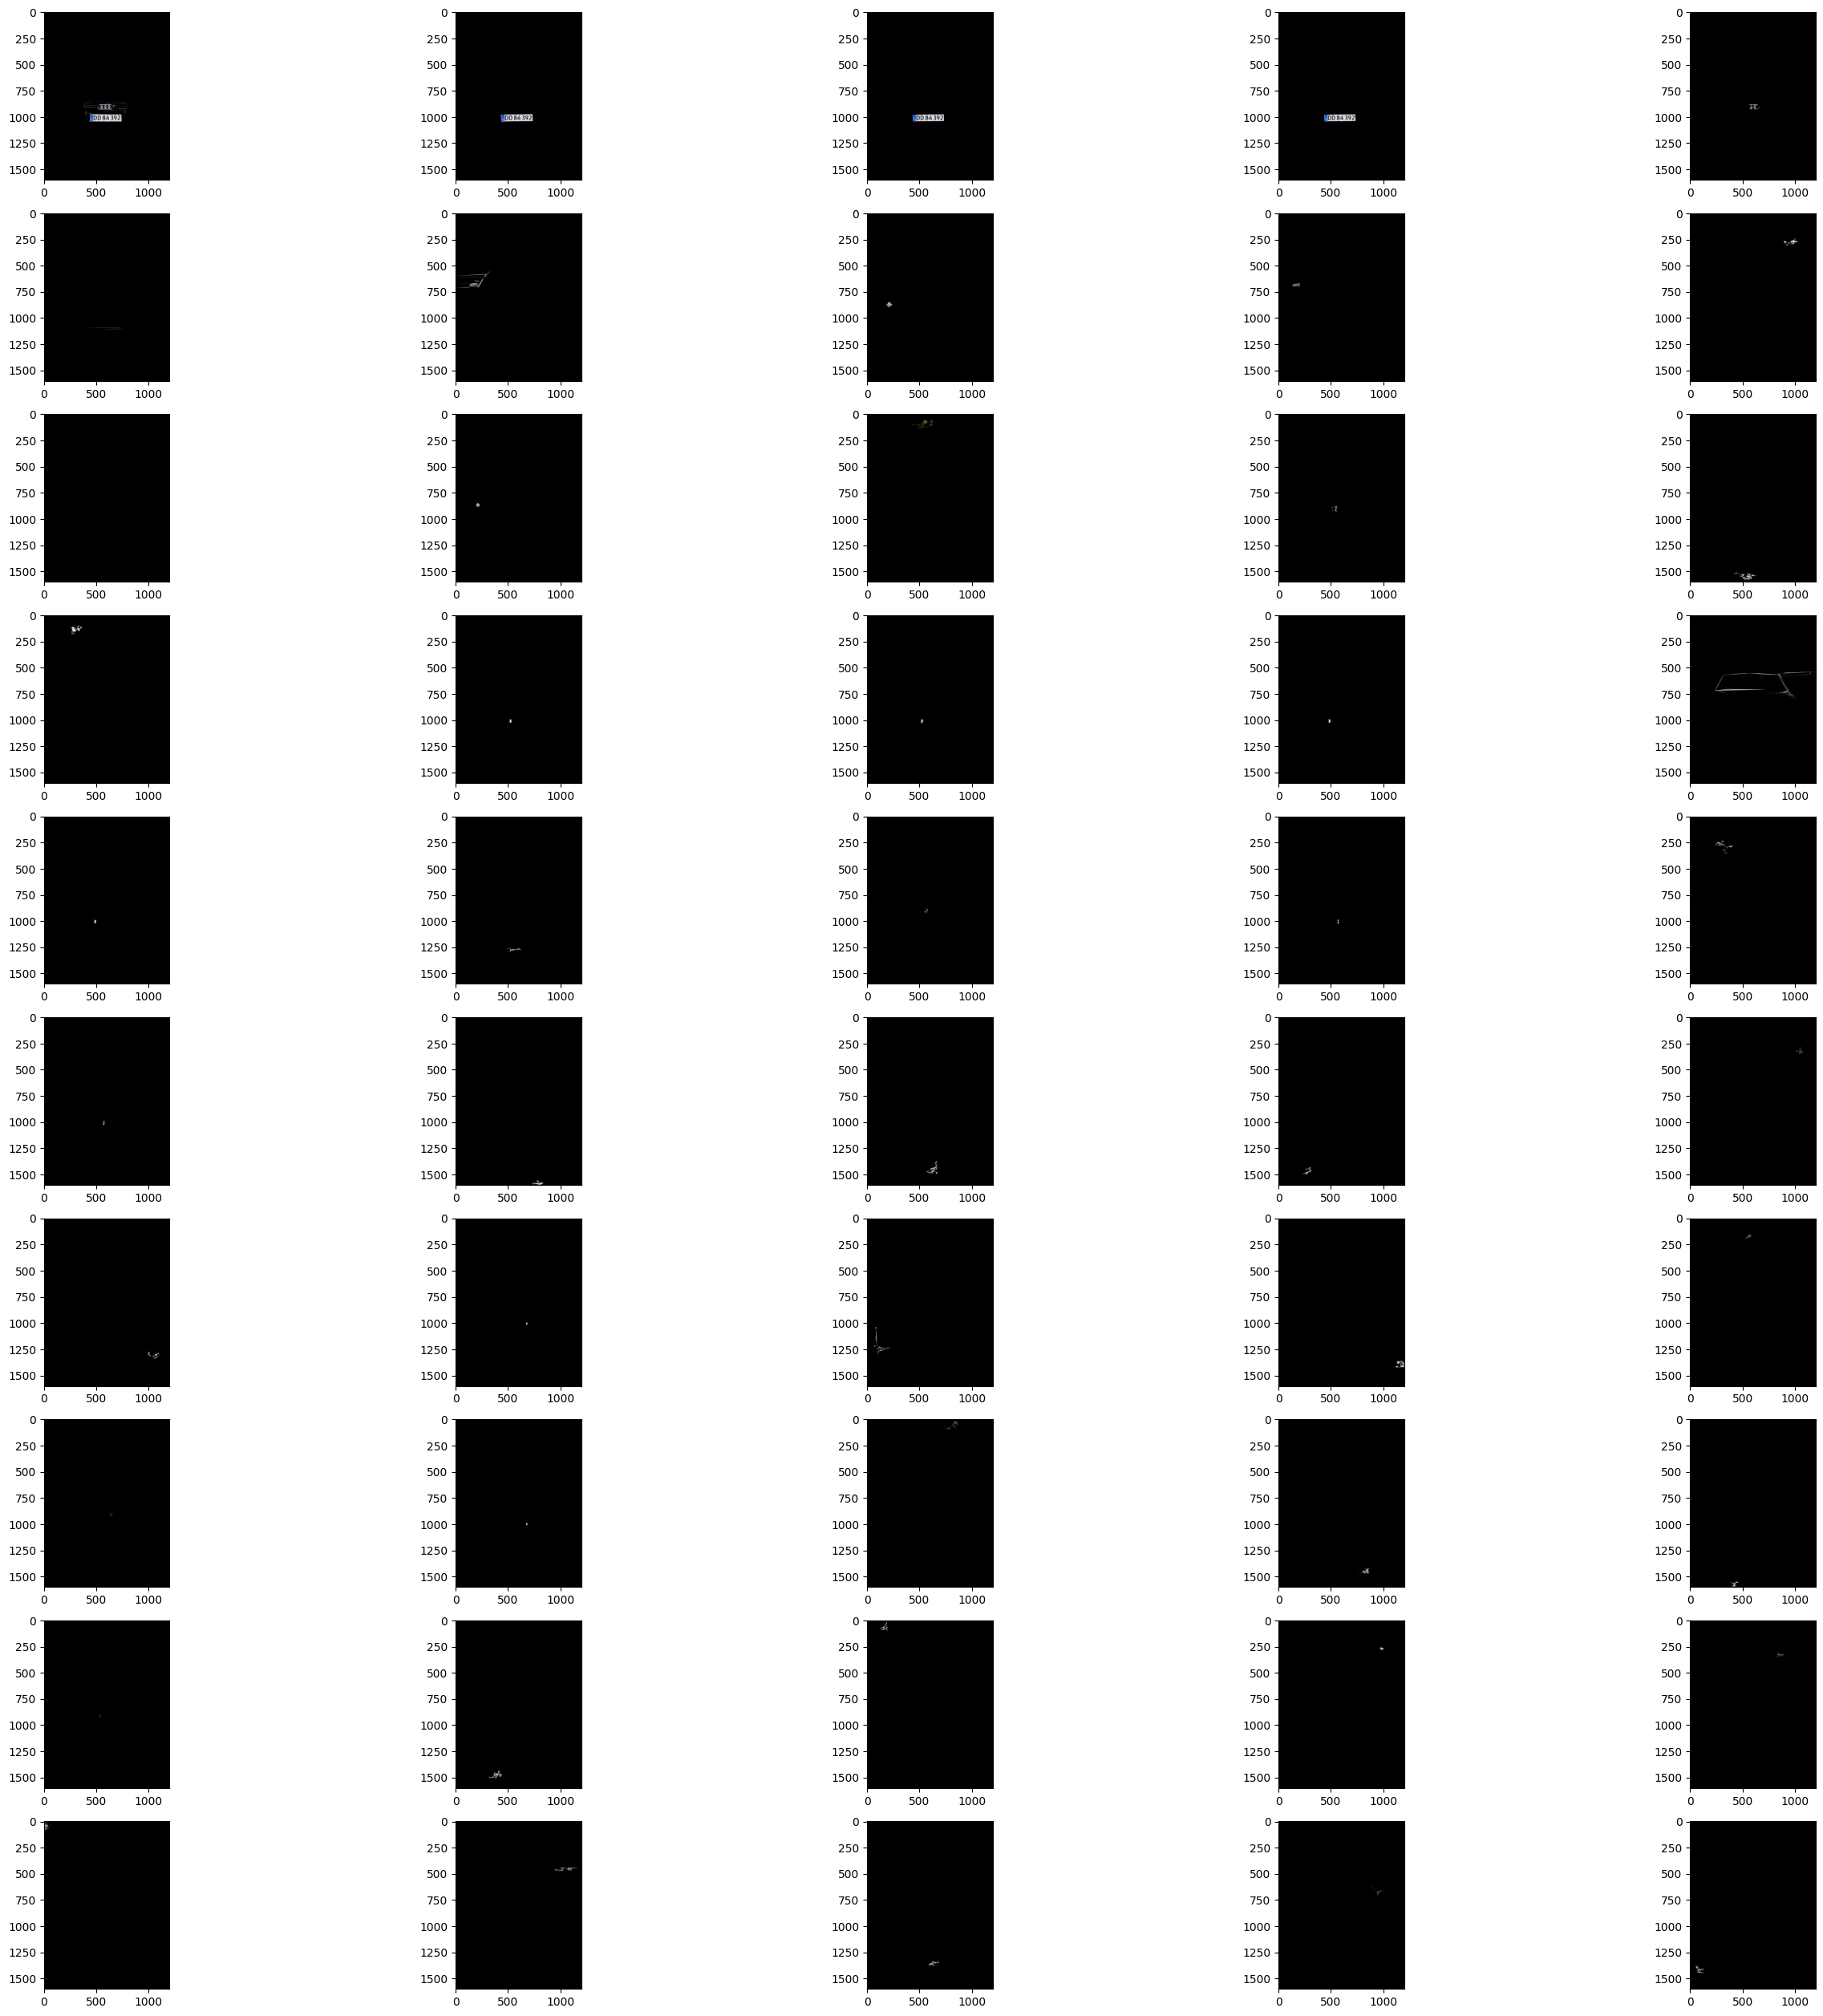

In [35]:
fig = plt.figure(figsize=(32, 32))
for i, contour in enumerate(contours):
    approx = cv2.approxPolyDP(contour, 10, True)
    # print(approx.size, len(approx))
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [approx], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    fig.add_subplot(10, 5, i + 1)
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

    # plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [39]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

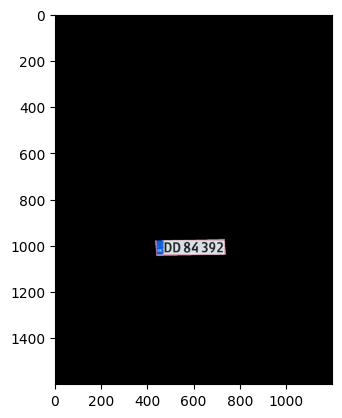

In [40]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [41]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

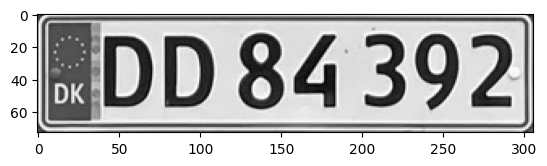

In [42]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [43]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[7, 39], [33, 39], [33, 59], [7, 59]], 'DK', 0.987867614383437),
 ([[35, 5], [305, 5], [305, 69], [35, 69]], 'DD 84 392|', 0.5530561533106645)]

In [54]:
plate = result[1][-2]

In [55]:
plate.replace(" ", "")
regex = re.compile('[^a-zA-Z1-9]')

In [57]:
regex.sub('', plate)

'DD84392'